https://docs.scipy.org/doc/numpy-1.13.0/user/quickstart.html

In [2]:
# 1.导入包
import numpy as np

In [2]:
# 2.打印numpy的版本和配置说明 
print(np.__version__)
np.show_config()

1.18.5
blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/lxh/opt/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/Users/lxh/opt/anaconda3/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/lxh/opt/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/Users/lxh/opt/anaconda3/include']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/lxh/opt/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/Users/lxh/opt/anaconda3/include']
lapack_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/lxh/opt/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/Users/lxh/opt/anaconda3/include']


In [3]:
# 3.创建一个长度为10的空向量
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
# 4. 如何找到任何一个数组的内存大小？
Z = np.zeros((10,10))
print("%d bytes" % (Z.size * Z.itemsize))

800 bytes


In [6]:
# 5. 如何从命令行得到numpy中add函数的说明文档?
np.info(np.add)

add(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Add arguments element-wise.

Parameters
----------
x1, x2 : array_like
    The arrays to be added. If ``x1.shape != x2.shape``, they must be broadcastable to a common shape (which becomes the shape of the output).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will be set to the ufunc result.
    Elsewhere, the `out` array will retain its original value.
    Note that if an uninitialized `out` array is created via the default
    ``out=None``,

In [7]:
# 6. 创建一个长度为10并且除了第五个值为1的空向量
Z = np.zeros(10)
Z[4] = 1
print(Z)



[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
# 7. 创建一个值域范围从10到49的向量
Z = np.arange(10,50)
Z

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])

In [10]:
# 8. 反转一个向量(第一个元素变为最后一个)
Z[::-1]

array([49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33,
       32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
       15, 14, 13, 12, 11, 10])

In [11]:
# 9. 创建一个 3x3 并且值从0到8的矩阵
Z = np.arange(9).reshape(3,3)
print(Z)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [12]:
# 10. 找到数组[1,2,0,0,4,0]中非0元素的位置索引
nz = np.nonzero([1,2,0,0,4,0])
print(nz)

(array([0, 1, 4]),)


In [ ]:
# 10.1 pandas找到非零元素对应index、column、以及值

import time
import cProfile
import pandas as pd
import numpy as np

# data 
tmp = pd.DataFrame(data=np.zeros((1000,1000)))
tmp.iloc[998,998] = 1

# pd 数据量大很慢
def test_df(va2):
    t1 = time.time()
    res2 = []
    for idx,val in va2.iterrows():
        for col in va2.columns:
            if val[col] > 0:
                res2.append((idx,col,val[col]))
    print(time.time()-t1)
    return res2
test_df(tmp)

# np 速度快
def test_np(df):
    t1 = time.time()
    npd = np.array(df)
    nonzero_index = np.nonzero(npd) # 以二维数组为例，返回非零元素行标、列标
    nonzero_data = npd[nonzero_index] # 非零数值列表
    nonzero_df_index = df.index[nonzero_index[0]] # 非零索引
    nonzero_df_columns = df.columns[nonzero_index[1]] # 非零字段列名
    res = list(zip(nonzero_df_index,nonzero_df_columns,nonzero_data))
    print(time.time()-t1)
    return res
test_np(tmp)

# 耗时对比：8.707995176315308/0.014760494232177734 = 589
# 大约提速600倍

cProfile.run("test_df(tmp)") # 函数性能测试，传入str(func)



In [14]:
# 11. 创建一个 3x3 的单位矩阵
Z = np.eye(3)
Z

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [15]:
# 12. 创建一个 3x3x3的随机数组
Z = np.random.random((3,3,3))
print(Z)

[[[0.58234322 0.55154633 0.22445061]
  [0.25164608 0.6838092  0.0152047 ]
  [0.45404905 0.25210313 0.29676001]]

 [[0.70450458 0.01082732 0.6017346 ]
  [0.33904527 0.98248598 0.21969467]
  [0.15080626 0.15479699 0.00611837]]

 [[0.23810024 0.46953085 0.9169118 ]
  [0.5892025  0.67538298 0.70011266]
  [0.19499532 0.72061221 0.70911775]]]


In [31]:
# 13. 创建一个 10x10 的随机数组并找到它的最大值和最小值, 及其对应下标
Z = np.random.random((5,5))
print(Z)
Zmin, Zmax = Z.min(), Z.max()
print(Zmin, Zmax)
print(Z.argmin(), Z.argmax())

[[0.27526417 0.37298363 0.94301064 0.73371958 0.88606032]
 [0.40973739 0.07874766 0.65135743 0.54298395 0.34998658]
 [0.21078713 0.63744741 0.47211027 0.75820463 0.22915628]
 [0.21134601 0.05018442 0.37972641 0.39403745 0.9070864 ]
 [0.08253669 0.55346816 0.75074881 0.57023017 0.57494053]]
0.05018441866747381 0.9430106377283017
16 2


In [34]:
# 14. 创建一个长度为30的随机向量并找到它的平均值
Z = np.random.random(30)
print(Z)
Z.mean()

[0.18961171 0.93252075 0.84255658 0.46352521 0.2389275  0.99825274
 0.00505293 0.81747098 0.53021065 0.15460361 0.96668275 0.1139799
 0.23821822 0.55677071 0.01687055 0.17002071 0.86970868 0.27063197
 0.67380525 0.26427913 0.82362376 0.81351969 0.12353466 0.44884795
 0.78985126 0.84480649 0.90756354 0.49790984 0.0640976  0.0081592 ]


0.4878538176191794

In [35]:
# 15. 创建一个二维数组，其中边界值为1，其余值为0
Z = np.ones((10,10))
Z[1:-1,1:-1] = 0
print(Z)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [36]:
# 16. 对于一个存在在数组，如何添加一个用0填充的边界?
Z = np.ones((5,5))
Z = np.pad(Z, pad_width=1, mode='constant', constant_values=0)
print(Z)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [41]:
# 17. 以下表达式运行的结果分别是什么?
print(0 * np.nan)
print(np.nan == np.nan)
print(np.inf > np.nan)
print(np.nan - np.nan)
print(0.3 == 3 * 0.1)

nan
False
False
nan
False


In [42]:
# 18. 创建一个 5x5的矩阵，并设置值1,2,3,4落在其对角线下方位置
Z = np.diag(1+np.arange(4),k=-1)
print(Z)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


In [43]:
# 19. 创建一个8x8 的矩阵，并且设置成棋盘样式
Z = np.zeros((8,8),dtype=int)
Z[1::2,::2] = 1
Z[::2,1::2] = 1
print(Z)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


In [44]:
# 20.考虑一个 (6,7,8) 形状的数组，其第100个元素的索引(x,y,z)是什么?
print(np.unravel_index(100,(6,7,8)))

(1, 5, 4)


In [48]:
# 21.用tile函数去创建一个 8x8的棋盘样式矩阵
Z = np.tile(np.array([[0,1],[1,0]]), (4,4))
print(Z)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


In [50]:
# 22.对一个5x5的随机矩阵做归一化
Z = np.random.random((5,5))
print(Z)
Zmax, Zmin = Z.max(), Z.min()
Z = (Z - Zmin)/(Zmax - Zmin)
print(Z)

[[0.97867156 0.43070456 0.6192699  0.4413099  0.87760321]
 [0.14650625 0.16852062 0.38342308 0.35716217 0.44600637]
 [0.05494434 0.24996404 0.3283369  0.15644644 0.44855688]
 [0.01663222 0.64866973 0.77407919 0.53140365 0.27160158]
 [0.6644818  0.29624144 0.52879279 0.30634508 0.36766458]]
[[1.         0.43041102 0.62641688 0.44143484 0.89494364]
 [0.13499867 0.1578817  0.38126389 0.35396676 0.44631662]
 [0.03982386 0.24253875 0.32400409 0.14533109 0.44896777]
 [0.         0.65697679 0.78733471 0.53508356 0.26503008]
 [0.67341278 0.29064218 0.53236968 0.3011445  0.36488358]]


In [51]:
# 23. 创建一个将颜色描述为(RGBA)四个无符号字节的自定义dtype？
color = np.dtype([("r", np.ubyte, 1),
                  ("g", np.ubyte, 1),
                  ("b", np.ubyte, 1),
                  ("a", np.ubyte, 1)])
color

<ipython-input-51-e9e4b5762d9e>:2: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  color = np.dtype([("r", np.ubyte, 1),


dtype([('r', 'u1'), ('g', 'u1'), ('b', 'u1'), ('a', 'u1')])

In [52]:
# 24.一个5x3的矩阵与一个3x2的矩阵相乘，实矩阵乘积是什么？
Z = np.dot(np.ones((5,3)), np.ones((3,2)))
print(Z)

[[3. 3.]
 [3. 3.]
 [3. 3.]
 [3. 3.]
 [3. 3.]]


In [53]:
# 25. 给定一个一维数组，对其在3到8之间的所有元素取反
Z = np.arange(11)
Z[(3 < Z) & (Z <= 8)] *= -1
print(Z)

[ 0  1  2  3 -4 -5 -6 -7 -8  9 10]


In [3]:
# 26. 下面脚本运行后的结果是什么?
print(sum(range(5),-1))  
print(np.sum(range(5),-1))

9
10


In [7]:
# 27. 考虑一个整数向量Z,下列表达合法的是哪个? 
Z = np.arange(5)
Z ** Z  # legal


array([  1,   1,   4,  27, 256])

In [9]:
Z = np.arange(5)
2 << Z >> 2  # false？？？？

array([0, 1, 2, 4, 8])

In [10]:
Z = np.arange(5)
Z<Z>Z    # false

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [12]:
Z = np.arange(5)
Z <- Z   # legal

array([False, False, False, False, False])

In [13]:
Z = np.arange(5)
1j*Z   # legal

array([0.+0.j, 0.+1.j, 0.+2.j, 0.+3.j, 0.+4.j])

In [14]:
Z = np.arange(5)
Z/1/1   # legal

array([0., 1., 2., 3., 4.])

In [16]:
# 28. 下列表达式的结果分别是什么?
print(np.array(0) / np.array(0))
print(np.array(0) // np.array(0))
print(np.array([np.nan]).astype(int).astype(float))

nan
0
[-9.22337204e+18]


<ipython-input-16-34334fe2b0d2>:2: RuntimeWarning: invalid value encountered in true_divide
  print(np.array(0) / np.array(0))
<ipython-input-16-34334fe2b0d2>:3: RuntimeWarning: divide by zero encountered in floor_divide
  print(np.array(0) // np.array(0))


In [17]:
# 29. 如何从零位对浮点数组做舍入 ?
Z = np.random.uniform(-10,+10,10)
print (np.copysign(np.ceil(np.abs(Z)), Z))

[-10.  -6.   2.   7.   5.   9.  -3.   8.   7.  -9.]


In [18]:
# 30. 如何找到两个数组中的共同元素?
Z1 = np.random.randint(0,10,10)
Z2 = np.random.randint(0,10,10)
print(np.intersect1d(Z1,Z2))

[3 4 6 7 9]


In [20]:
# 31. 如何忽略所有的 numpy 警告(尽管不建议这么做)?

# Suicide mode on  
defaults = np.seterr(all="ignore")  
Z = np.ones(1) / 0  

# Back to sanity  
_ = np.seterr(**defaults)  

# An equivalent way, with a context manager:  

with np.errstate(divide='ignore'):  
    Z = np.ones(1) / 0

In [21]:
# 32. 下面的表达式是正确的吗?  前者nan，后者虚数
np.sqrt(-1) == np.emath.sqrt(-1)

<ipython-input-21-c70d622b215b>:2: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(-1) == np.emath.sqrt(-1)


False

In [22]:
# 33. 如何得到昨天，今天，明天的日期? 
yesterday = np.datetime64('today', 'D') - np.timedelta64(1, 'D')
today     = np.datetime64('today', 'D')
tomorrow  = np.datetime64('today', 'D') + np.timedelta64(1, 'D')
print ("Yesterday is " + str(yesterday))
print ("Today is " + str(today))
print ("Tomorrow is "+ str(tomorrow))

Yesterday is 2022-09-28
Today is 2022-09-29
Tomorrow is 2022-09-30


In [23]:
# 34. 如何得到所有与2016年7月对应的日期？
Z = np.arange('2016-07', '2016-08', dtype='datetime64[D]')
print(Z)

['2016-07-01' '2016-07-02' '2016-07-03' '2016-07-04' '2016-07-05'
 '2016-07-06' '2016-07-07' '2016-07-08' '2016-07-09' '2016-07-10'
 '2016-07-11' '2016-07-12' '2016-07-13' '2016-07-14' '2016-07-15'
 '2016-07-16' '2016-07-17' '2016-07-18' '2016-07-19' '2016-07-20'
 '2016-07-21' '2016-07-22' '2016-07-23' '2016-07-24' '2016-07-25'
 '2016-07-26' '2016-07-27' '2016-07-28' '2016-07-29' '2016-07-30'
 '2016-07-31']


In [37]:
# 35. 如何直接在位计算(A+B)\*(-A/2)(不建立副本)? 直接赋值给输出的变量
A = np.ones(3)*1
B = np.ones(3)*2
C = np.ones(3)*3
print(np.add(A,B,out=B),B)
print(np.divide(A,2,out=A),A)
print(np.negative(A,out=A),A)
print(np.multiply(A,B,out=A),A)

[3. 3. 3.] [3. 3. 3.]
[0.5 0.5 0.5] [0.5 0.5 0.5]
[-0.5 -0.5 -0.5] [-0.5 -0.5 -0.5]
[-1.5 -1.5 -1.5] [-1.5 -1.5 -1.5]


In [40]:
# 36. 用五种不同的方法去提取一个随机数组的整数部分 
Z = np.random.uniform(0,10,10)
Z

array([7.3071293 , 9.43436202, 5.93610458, 7.01819028, 1.61696523,
       2.80766372, 8.60673359, 4.74082997, 7.4232468 , 9.42700342])

In [42]:
print (Z - Z%1)
print (np.floor(Z))
print (np.ceil(Z)-1)
print (Z.astype(int))
print (np.trunc(Z))

[7. 9. 5. 7. 1. 2. 8. 4. 7. 9.]
[7. 9. 5. 7. 1. 2. 8. 4. 7. 9.]
[7. 9. 5. 7. 1. 2. 8. 4. 7. 9.]
[7 9 5 7 1 2 8 4 7 9]
[7. 9. 5. 7. 1. 2. 8. 4. 7. 9.]


In [44]:
# 37. 创建一个5x5的矩阵，其中每行的数值范围从0到4 
Z = np.zeros((5,5))
Z += np.arange(5)
print (Z)

print(np.tile(np.arange(5),(4,1)))

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]
[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [45]:
# 38. 通过考虑一个可生成10个整数的函数，来构建一个数组
def generate():
    for x in range(10):
        yield x
Z = np.fromiter(generate(),dtype=float,count=-1)
print (Z)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [46]:
#39. 创建一个长度为10的随机向量，其值域范围从0到1，但是不包括0和1
Z = np.linspace(0,1,11,endpoint=False)[1:]
print (Z)

[0.09090909 0.18181818 0.27272727 0.36363636 0.45454545 0.54545455
 0.63636364 0.72727273 0.81818182 0.90909091]


In [47]:
# 40. 创建一个长度为10的随机向量，并将其排序 
Z = np.random.random(10)
Z.sort()
print (Z)

[0.23289759 0.24303173 0.42321989 0.44638401 0.50977158 0.65775556
 0.67072652 0.81444176 0.98090531 0.99563708]


In [48]:
# 41.对于一个小数组，如何用比 np.sum更快的方式对其求和？
Z = np.arange(10)
np.add.reduce(Z)

45

In [49]:
np.sum(Z)

45

In [50]:
# 42. 对于两个随机数组A和B，检查它们是否相等

A = np.random.randint(0,2,5)
B = np.random.randint(0,2,5)
# Assuming identical shape of the arrays and a tolerance for the comparison of values
equal = np.allclose(A,B)
print(equal)

False


In [51]:
# 方法2
# Checking both the shape and the element values, no tolerance (values have to be exactly equal)
equal = np.array_equal(A,B)
print(equal)

False


In [52]:
# 43. 创建一个只读数组(read-only)
Z = np.zeros(10)  
Z.flags.writeable = False  
Z[0] = 1  


ValueError: assignment destination is read-only

In [53]:
# 44. 将笛卡尔坐标下的一个10x2的矩阵转换为极坐标形式

Z = np.random.random((10,2))
X,Y = Z[:,0], Z[:,1]
R = np.sqrt(X**2+Y**2)
T = np.arctan2(Y,X)
print (R)
print (T)

[0.77978794 0.70153196 0.79965071 0.90433415 0.78637821 0.37037469
 1.00231096 0.44567238 0.78449167 0.65293922]
[0.72166846 0.26417515 0.08251915 0.18226964 1.42379366 0.73728742
 1.02087992 0.99733777 0.20562477 0.98766301]


In [54]:
# 45. 创建一个长度为10的向量，并将向量中最大值替换为1
Z = np.random.random(10)
Z[Z.argmax()] = 0
print (Z)

[0.14538455 0.84600585 0.52904356 0.5999962  0.13514338 0.
 0.16621922 0.49180909 0.27396939 0.04960915]


In [55]:
# 46. 创建一个结构化数组，并实现 x 和 y 坐标覆盖 [0,1]x[0,1] 区域   即x,y笛卡尔积坐标
Z = np.zeros((5,5), [('x',float),('y',float)])
Z['x'], Z['y'] = np.meshgrid(np.linspace(0,1,5),
                             np.linspace(0,1,5))
print(Z)

[[(0.  , 0.  ) (0.25, 0.  ) (0.5 , 0.  ) (0.75, 0.  ) (1.  , 0.  )]
 [(0.  , 0.25) (0.25, 0.25) (0.5 , 0.25) (0.75, 0.25) (1.  , 0.25)]
 [(0.  , 0.5 ) (0.25, 0.5 ) (0.5 , 0.5 ) (0.75, 0.5 ) (1.  , 0.5 )]
 [(0.  , 0.75) (0.25, 0.75) (0.5 , 0.75) (0.75, 0.75) (1.  , 0.75)]
 [(0.  , 1.  ) (0.25, 1.  ) (0.5 , 1.  ) (0.75, 1.  ) (1.  , 1.  )]]


In [56]:
# 47. 给定两个数组X和Y，构造Cauchy矩阵C (Cij =1/(xi - yj))
X = np.arange(8)
Y = X + 0.5
C = 1.0 / np.subtract.outer(X, Y)
print(np.linalg.det(C))

3638.1636371179666


In [57]:
# 48. 打印每个numpy标量类型的最小值和最大值？

for dtype in [np.int8, np.int32, np.int64]:
    print(np.iinfo(dtype).min)
    print(np.iinfo(dtype).max)

for dtype in [np.float32, np.float64]:
    print(np.finfo(dtype).min)
    print(np.finfo(dtype).max)
    print(np.finfo(dtype).eps)

-128
127
-2147483648
2147483647
-9223372036854775808
9223372036854775807
-3.4028235e+38
3.4028235e+38
1.1920929e-07
-1.7976931348623157e+308
1.7976931348623157e+308
2.220446049250313e-16


In [59]:
# 49. 如何打印一个数组中的所有数值?
np.set_printoptions(precision=4)  #控制输出的小数点个数是4
np.array([1.123456789])

array([1.1235])

In [61]:
np.set_printoptions(threshold=5) #控制输出的值的个数为6，其余以...代替
np.arange(10)


array([0, 1, 2, ..., 7, 8, 9])

In [62]:
# 50. 给定标量时，如何找到数组中最接近标量的值
Z = np.arange(100)
v = np.random.uniform(0,100)  # 随机值
index = (np.abs(Z-v)).argmin() # 差最小下标
print (Z[index])

17


In [63]:
# 51. 创建一个表示位置(x,y)和颜色(r,g,b)的结构化数组
Z = np.zeros(10, [ ('position', [ ('x', float, 1),
                                  ('y', float, 1)]),
                   ('color',    [ ('r', float, 1),
                                  ('g', float, 1),
                                  ('b', float, 1)])])
print (Z)

[((0., 0.), (0., 0., 0.)) ((0., 0.), (0., 0., 0.))
 ((0., 0.), (0., 0., 0.)) ... ((0., 0.), (0., 0., 0.))
 ((0., 0.), (0., 0., 0.)) ((0., 0.), (0., 0., 0.))]


<ipython-input-63-af59f05ebb9b>:2: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  Z = np.zeros(10, [ ('position', [ ('x', float, 1),


In [65]:
# 52. 对一个表示坐标形状为(10,2)的随机向量，找到点与点的距离

Z = np.random.random((10,2))
X,Y = np.atleast_2d(Z[:,0], Z[:,1])
D = np.sqrt( (X-X.T)**2 + (Y-Y.T)**2)
print (D,D.shape)

[[0.     0.5129 0.0499 ... 0.5439 0.1317 0.3667]
 [0.5129 0.     0.5626 ... 0.0412 0.5995 0.5445]
 [0.0499 0.5626 0.     ... 0.5938 0.1146 0.379 ]
 ...
 [0.5439 0.0412 0.5938 ... 0.     0.6252 0.5856]
 [0.1317 0.5995 0.1146 ... 0.6252 0.     0.4924]
 [0.3667 0.5445 0.379  ... 0.5856 0.4924 0.    ]] (10, 10)


In [66]:
# 方法2
# Much faster with scipy
import scipy
# Thanks Gavin Heverly-Coulson (#issue 1)
import scipy.spatial
D = scipy.spatial.distance.cdist(Z,Z)
print (D)

[[0.     0.5129 0.0499 ... 0.5439 0.1317 0.3667]
 [0.5129 0.     0.5626 ... 0.0412 0.5995 0.5445]
 [0.0499 0.5626 0.     ... 0.5938 0.1146 0.379 ]
 ...
 [0.5439 0.0412 0.5938 ... 0.     0.6252 0.5856]
 [0.1317 0.5995 0.1146 ... 0.6252 0.     0.4924]
 [0.3667 0.5445 0.379  ... 0.5856 0.4924 0.    ]]


In [67]:
# 53. 如何将32位的浮点数(float)转换为对应的整数(integer)?
Z = np.arange(10, dtype=np.int32)
Z = Z.astype(np.float32, copy=False)
print (Z)

[0. 1. 2. ... 7. 8. 9.]


In [ ]:
# 54. 如何读取以下文件?  (提示: np.genfromtxt)
1, 2, 3, 4, 5  
6,  ,  , 7, 8  
 ,  , 9,10,11

In [68]:
# 55. 对于numpy数组，enumerate的等价操作是什么？
Z = np.arange(9).reshape(3,3)
for index, value in np.ndenumerate(Z):
    print (index, value)

for index in np.ndindex(Z.shape):
    print (index, Z[index])

(0, 0) 0
(0, 1) 1
(0, 2) 2
(1, 0) 3
(1, 1) 4
(1, 2) 5
(2, 0) 6
(2, 1) 7
(2, 2) 8
(0, 0) 0
(0, 1) 1
(0, 2) 2
(1, 0) 3
(1, 1) 4
(1, 2) 5
(2, 0) 6
(2, 1) 7
(2, 2) 8


In [69]:
# 56. 生成一个通用的二维Gaussian-like数组
X, Y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
D = np.sqrt(X*X+Y*Y)
sigma, mu = 1.0, 0.0
G = np.exp(-( (D-mu)**2 / ( 2.0 * sigma**2 ) ) )
print (G)

[[0.3679 0.4482 0.5198 ... 0.5198 0.4482 0.3679]
 [0.4482 0.5461 0.6333 ... 0.6333 0.5461 0.4482]
 [0.5198 0.6333 0.7344 ... 0.7344 0.6333 0.5198]
 ...
 [0.5198 0.6333 0.7344 ... 0.7344 0.6333 0.5198]
 [0.4482 0.5461 0.6333 ... 0.6333 0.5461 0.4482]
 [0.3679 0.4482 0.5198 ... 0.5198 0.4482 0.3679]]


(array([1., 0., 2., ..., 0., 0., 1.]),
 array([-9.3442, -9.1597, -8.9751, ...,  8.7402,  8.9247,  9.1092]),
 <a list of 100 Patch objects>)

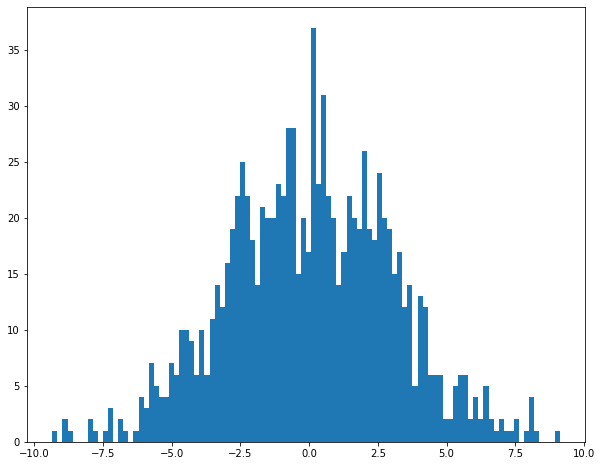

In [78]:
import matplotlib.pyplot as plt
x = np.random.normal(0,3,1000) # 0 mean and 3 standard deviation
plt.figure(figsize=(10,8),)
plt.hist(x,100)

In [89]:
# 57. 对一个二维数组，如何在其内部随机放置p个元素?
n = 10
p = 10
Z = np.zeros((n,n))
np.put(Z, np.random.choice(range(n*n), p, replace=False),1) # 在[0,n*n-1]无重复随机取p个数，put做替换
print (Z)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [90]:
# 58. 减去一个矩阵中的每一行的平均值 
X = np.random.rand(2, 3)
print(X)
Y = X - X.mean(axis=1, keepdims=True)
print(Y)

[[0.7005 0.2572 0.7238]
 [0.56   0.0333 0.9412]]
[[ 0.14   -0.3033  0.1633]
 [ 0.0485 -0.4782  0.4297]]


In [ ]:
# 59. 如何通过第n列对一个数组进行排序?

Z = np.random.randint(0,10,(3,3))
print (Z)
print (Z[Z[:,1].argsort()])   # 以每行为标准，按照第二列的值对每行从小到大排序

In [98]:
# 60. 如何检查一个二维数组是否有空列？
Z = np.random.randint(0,3,(3,10))
print(Z)
print ((~Z.any(axis=0)).any())

[[2 1 0 ... 1 2 2]
 [0 1 0 ... 0 0 0]
 [2 0 1 ... 1 0 1]]
False


In [101]:
# 61. 从数组中的给定值中找出最近的值 
Z = np.random.uniform(0,1,10)
z = 0.5
m = Z.flat[np.abs(Z - z).argmin()]
print (m)

0.4986896869217914


In [102]:
# 62. 如何用迭代器(iterator)计算两个分别具有形状(1,3)和(3,1)的数组? 
A = np.arange(3).reshape(3,1)
B = np.arange(3).reshape(1,3)
it = np.nditer([A,B,None])
for x,y,z in it: 
    z[...] = x + y
print (it.operands[2])

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [103]:
#63. 创建一个具有name属性的数组类

class NamedArray(np.ndarray):
    def __new__(cls, array, name="no name"):
        obj = np.asarray(array).view(cls)
        obj.name = name
        return obj
    def __array_finalize__(self, obj):
        if obj is None: return
        self.info = getattr(obj, 'name', "no name")

Z = NamedArray(np.arange(10), "range_10")
print (Z.name)

range_10


In [104]:
# 64. 考虑一个给定的向量，如何对由第二个向量索引的每个元素加1(小心重复的索引)?
Z = np.ones(10)
I = np.random.randint(0,len(Z),20)
Z += np.bincount(I, minlength=len(Z))
print(Z)

[3. 3. 3. ... 2. 7. 2.]


In [105]:
# 方法2
np.add.at(Z, I, 1)
print(Z)

[ 5.  5.  5. ...  3. 13.  3.]


In [106]:
# 65. 根据索引列表(I)，如何将向量(X)的元素累加到数组(F)?
# np.bincount(x) 统计一个列表中的整数数字的出现频率，从0开始到列表中最大值都会统计
X = [1,2,3,4,5,6]
I = [1,3,9,3,4,1]
F = np.bincount(I,X)
print (F)

[0. 7. 0. ... 0. 0. 3.]


In [107]:
#66. 考虑一个(dtype=ubyte) 的 (w,h,3)图像，计算其唯一颜色的数量
w,h = 16,16
I = np.random.randint(0,2,(h,w,3)).astype(np.ubyte)
#Note that we should compute 256*256 first. 
#Otherwise numpy will only promote F.dtype to 'uint16' and overfolw will occur
F = I[...,0]*(256*256) + I[...,1]*256 +I[...,2]
n = len(np.unique(F))
print (n)

8


In [108]:
# 67. 考虑一个四维数组，如何一次性计算出最后两个轴(axis)的和？
A = np.random.randint(0,10,(3,4,3,4))
# solution by passing a tuple of axes (introduced in numpy 1.7.0)
sum = A.sum(axis=(-2,-1))
print (sum)

[[39 48 46 67]
 [65 42 48 43]
 [68 49 54 59]]


In [109]:
# 方法2
sum = A.reshape(A.shape[:-2] + (-1,)).sum(axis=-1)
print (sum)

[[39 48 46 67]
 [65 42 48 43]
 [68 49 54 59]]


In [110]:
#68. 考虑一个一维向量D，如何使用相同大小的向量S来计算D子集的均值？
D = np.random.uniform(0,1,100)
S = np.random.randint(0,10,100)
D_sums = np.bincount(S, weights=D)
D_counts = np.bincount(S)
D_means = D_sums / D_counts
print (D_means)

[0.5961 0.4902 0.4915 ... 0.496  0.4705 0.405 ]


In [111]:
# 方法2
import pandas as pd
print(pd.Series(D).groupby(S).mean())

0    0.596072
1    0.490181
2    0.491531
3    0.720406
4    0.568960
5    0.587415
6    0.515196
7    0.496011
8    0.470451
9    0.405047
dtype: float64


In [113]:
#69. 如何获得点积 dot prodcut的对角线?
A = np.random.uniform(0,1,(5,5))
B = np.random.uniform(0,1,(5,5))
# slow version
np.diag(np.dot(A, B))

array([1.5822, 1.3228, 1.4944, 0.384 , 0.9464])

In [114]:
# 方法2
# Fast version
np.sum(A * B.T, axis=1)

array([1.5822, 1.3228, 1.4944, 0.384 , 0.9464])

In [115]:
# 70. 考虑一个向量[1,2,3,4,5],如何建立一个新的向量，在这个新向量中每个值之间有3个连续的零？
Z = np.array([1,2,3,4,5])
nz = 3
Z0 = np.zeros(len(Z) + (len(Z)-1)*(nz))
Z0[::nz+1] = Z
print (Z0)

[1. 0. 0. ... 0. 0. 5.]


In [116]:
#71. 考虑一个维度(5,5,3)的数组，如何将其与一个(5,5)的数组相乘？
A = np.ones((5,5,3))
B = 2*np.ones((5,5))
print (A * B[:,:,None])

[[[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]]


In [117]:
#72. 如何对一个数组中任意两行做交换?
A = np.arange(25).reshape(5,5)
A[[0,1]] = A[[1,0]]
print (A)


[[ 5  6  7  8  9]
 [ 0  1  2  3  4]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [118]:
# 73. 考虑一个可以描述10个三角形的triplets，找到可以分割全部三角形的line segment
faces = np.random.randint(0,100,(10,3))
F = np.roll(faces.repeat(2,axis=1),-1,axis=1)
F = F.reshape(len(F)*3,2)
F = np.sort(F,axis=1)
G = F.view( dtype=[('p0',F.dtype),('p1',F.dtype)] )
G = np.unique(G)
print (G)

[( 0, 61) ( 0, 77) (11, 21) ... (61, 77) (65, 83) (65, 95)]


In [119]:
#74. 给定一个二进制的数组C，如何产生一个数组A满足np.bincount(A)==C
C = np.bincount([1,1,2,3,4,4,6])
A = np.repeat(np.arange(len(C)), C)
print (A)

[1 1 2 ... 4 4 6]


In [120]:
# 75. 如何通过滑动窗口计算一个数组的平均数? 
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
Z = np.arange(20)

print(moving_average(Z, n=3))

[ 1.  2.  3. ... 16. 17. 18.]


In [121]:
# 76. Consider a one-dimensional array Z, build a two-dimensional array whose first row is (Z[0],Z[1],Z[2]) and each subsequent row is shifted by 1 (last row should be (Z[-3],Z[-2],Z[-1])
from numpy.lib import stride_tricks

def rolling(a, window):
    shape = (a.size - window + 1, window)
    strides = (a.itemsize, a.itemsize)
    return stride_tricks.as_strided(a, shape=shape, strides=strides)
Z = rolling(np.arange(10), 3)

print (Z)

[[0 1 2]
 [1 2 3]
 [2 3 4]
 ...
 [5 6 7]
 [6 7 8]
 [7 8 9]]


In [122]:
# 77. 如何对布尔值取反，或者原位(in-place)改变浮点数的符号(sign)？
Z = np.random.randint(0,2,100)
np.logical_not(Z, out=Z)

array([0, 1, 0, ..., 0, 1, 1])

In [123]:
Z = np.random.uniform(-1.0,1.0,100)
np.negative(Z, out=Z)

array([-0.0322, -0.3852, -0.6663, ...,  0.6631,  0.2448, -0.6605])

In [124]:
# 78. 考虑两组点集P0和P1去描述一组线(二维)和一个点p,如何计算点p到每一条线 i (P0[i],P1[i])的距离？
def distance(P0, P1, p):
    T = P1 - P0
    L = (T**2).sum(axis=1)
    U = -((P0[:,0]-p[...,0])*T[:,0] + (P0[:,1]-p[...,1])*T[:,1]) / L
    U = U.reshape(len(U),1)
    D = P0 + U*T - p
    return np.sqrt((D**2).sum(axis=1))

P0 = np.random.uniform(-10,10,(10,2))
P1 = np.random.uniform(-10,10,(10,2))
p  = np.random.uniform(-10,10,( 1,2))

print (distance(P0, P1, p))

[5.2685 8.5997 4.2241 ... 1.3797 4.4782 4.337 ]


In [125]:
# 79.考虑两组点集P0和P1去描述一组线(二维)和一组点集P，如何计算每一个点 j(P[j]) 到每一条线 i (P0[i],P1[i])的距离？
# based on distance function from previous question
P0 = np.random.uniform(-10, 10, (10,2))
P1 = np.random.uniform(-10,10,(10,2))
p = np.random.uniform(-10, 10, (10,2))
print (np.array([distance(P0,P1,p_i) for p_i in p]))

[[ 5.7653 10.6489  2.4826 ...  1.3337 12.5636  3.4864]
 [ 1.2477  4.1773  3.1462 ...  6.9818  3.4317  6.2618]
 [ 7.1807 12.1529  4.5917 ...  0.2903 10.9453  2.0008]
 ...
 [ 9.2745 14.2011  5.7079 ...  2.2603 11.6437  2.8881]
 [ 9.6879 15.1663 12.2829 ...  4.0205  1.976   6.7189]
 [ 6.6509 12.4306 13.3276 ...  1.738   3.1472 12.1062]]


In [128]:
# 范数
np.linalg.norm([1,2],ord=1)

3.0

In [129]:
np.linalg.norm([1,2],ord=2)

2.23606797749979

In [132]:
np.linalg.norm([[1,2]],ord=np.inf,keepdims=True)

array([[3.]])

In [ ]:
# np.c_ 行数必须相等, np.r_ 列数必须相等
arr1=np.array([1,2,3])
print(arr1.shape)   #(3,)代表arr1是一个包含3个元素的一维数组  可以把它看作是一个列向量
arr2=np.array([4,5,6])  
print(np.c_[arr1,arr2])   #行数相同
 
arr3=np.array([[1,2],[4,5],[7,8]])
print(np.c_[arr1,arr2,arr3])  #行数相同

arr4=np.random.randint(0,10,(5,3))
print(np.c_[np.ones(5),arr4])  #行数相同